# 1. Baseball Database

The [Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) has an sqlite version. Download it for these exercises. 

**1.1** Which player has had the most homeruns? List top 25 players and provide their first and last names

**1.2** Which team historically has paid the highest salary on average? Your query should only output teams whose average salary is above $1M. If average salary is formatted as scientific notation, convert it to numbers, i.e. 4.291454e+06 =  4291453 **Join

**1.3** Which team has the most players in the Hall of Fame? ** join 

**1.4** Is there a relation between how many homeruns a player has made in a year and their salary that year? Pull Player's name, ID, Year, Salary and homeruns together in a single query. Use visualizations, descriptive statistics and regression analysis to determine if there is any relation between homeruns and salary ** Join 

**1.5** Calculate annual change in salary for every player in the previous query

**1.6** What is the median salary of all players?

**1.7 (BONUS)** Find all birth year that appears in the people table consecutively at least three times.

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv

In [2]:
conn = sqlite3.connect('../data/lahmansbaseballdb.sqlite')
c = conn.cursor()

pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'",con=conn)

,name
0,allstarfull
1,appearances
2,awardsmanagers
3,awardsplayers
4,awardssharemanagers
5,awardsshareplayers
6,batting
7,battingpost
8,collegeplaying
9,divisions


In [3]:
#**1.1** Which player has had the most homeruns? List top 25 players and provide their first and last names

pd.read_sql("""SELECT playerID, HR
                FROM batting
                order by HR desc
                limit 25
                """, conn)

,playerID,HR
0,bondsba01,73
1,mcgwima01,70
2,sosasa01,66
3,mcgwima01,65
4,sosasa01,64
5,sosasa01,63
6,marisro01,61
7,ruthba01,60
8,ruthba01,59
9,stantmi03,59


In [6]:

#**1.2** Which team historically has paid the highest salary on average? 
# Your query should only output teams whose average salary is above $1M. 
# If average salary is formatted as scientific notation, convert it to numbers, i.e. 4.291454e+06 =  4291453

pd.read_sql("""SELECT t1.name, 
                cast(avg(salary) as int) as avg_salary
                FROM salaries as s1
                inner join teams as t1
                on s1.teamID=t1.teamID
                where salary>1.291454e+06
                group by name
                having avg(salary)>1.001160e+06
                order by avg_salary desc
                
                """, conn)

,name,avg_salary
0,New York Yankees,7901159
1,New York Highlanders,7901159
2,Los Angeles Angels of Anaheim,7627261
3,Los Angeles Angels,7627261
4,Los Angeles Dodgers,6203980
5,Detroit Tigers,6041392
6,Philadelphia Quakers,5942954
7,Philadelphia Phillies,5942954
8,Philadelphia Blue Jays,5942954
9,Boston Red Sox,5849524


In [7]:
#**1.3** Which team has the most players in the Hall of Fame? 
pd.read_sql("""SELECT count(hf1.playerID) as player_cnt, t1.name as team_name
                FROM halloffame as hf1
                inner join teams as t1
                on hf1.ID=t1.ID
                group by name
                order by player_cnt desc
                limit 5
                """, conn)



,player_cnt,team_name
0,129,Pittsburgh Pirates
1,129,Cincinnati Reds
2,128,Philadelphia Phillies
3,120,St. Louis Cardinals
4,119,Detroit Tigers


In [202]:
#**1.4** Is there a relation between how many homeruns a player has made in a year 
# and their salary that year? Pull Player's name, ID, Year, Salary 
# and homeruns together in a single query. Use visualizations, descriptive statistics 
# and regression analysis to determine if there is any relation between homeruns and salary
#join player ID and yearID
#use year
#suqare option
#correlation matrix
df1=pd.read_sql("""SELECT t1.playerID, t1.hr, t2.salary, t1.yearID
                FROM batting as t1
                inner join(
                    select playerID, yearID, salary
                    from salaries
                    ) t2
                on t1.playerID=t2.playerID
                group by t1.playerID
                order by t1.hr
                """, conn)

In [235]:
df1

,playerID,HR,salary,yearID
0,aardsda01,0,300000.0,2004
1,aasedo01,0,600000.0,1977
2,abadan01,0,327000.0,2001
3,abadfe01,0,418000.0,2010
4,abbotji01,0,68000.0,1989
...,...,...,...,...
5144,ugglada01,27,327000.0,2006
5145,incavpe01,30,210000.0,1986
5146,braunry02,34,455000.0,2007
5147,abreujo02,36,7000000.0,2014


In [242]:
#As the years pass the salary increases in accordance with the Homeruns
#We know that the years has a positive impact for sure with the P value 0
#The HomeRuns have definitely an impact on the salary
x=df1[['HR', 'yearID']]
X=sm.add_constant(x)
y=df1['salary']
linearmodel=sm.OLS(y,X).fit()
print(linearmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           4.78e-56
Time:                        17:11:19   Log-Likelihood:                -75536.
No. Observations:                5149   AIC:                         1.511e+05
Df Residuals:                    5146   BIC:                         1.511e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.892e+07   1.41e+06    -13.438      0.0

C:\Users\mehme\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


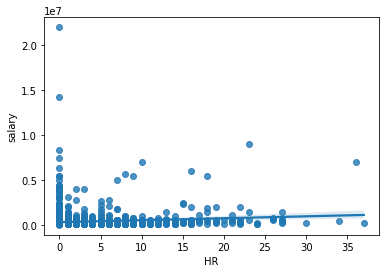

In [229]:
#Visualization
#Despite of the outliers there is a linear progress in the salary.
sns.regplot(x="HR", y="salary", data=df1);

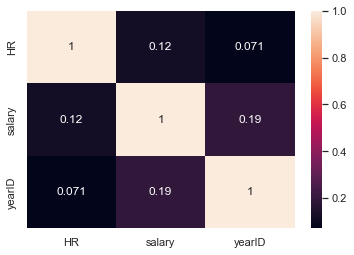

In [247]:
#I wanted to double check it with the correlation matrix.
#Year has a higher impact on the salary in correlation with the HR and Salary
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [161]:
#**1.5** Calculate annual change in salary for every player in the previous query

pd.read_sql("""SELECT PlayerID,
                yearID,
                salary,
                lag(salary,1,0) over(
                    partition by playerID
                    order by yearID
                ) as NextSalary
                FROM salaries
                order by playerID, yearID desc
                """, conn)

,playerID,yearID,salary,NextSalary
0,aardsda01,2012,500000.0,4500000.0
1,aardsda01,2011,4500000.0,2750000.0
2,aardsda01,2010,2750000.0,419000.0
3,aardsda01,2009,419000.0,403250.0
4,aardsda01,2008,403250.0,387500.0
...,...,...,...,...
26423,zupcibo01,1993,222000.0,109000.0
26424,zupcibo01,1992,109000.0,100000.0
26425,zupcibo01,1991,100000.0,0.0
26426,zuvelpa01,1989,145000.0,0.0


In [210]:
#**1.6** What is the median salary of all players? fix median
#use row number ... sort by salary, creat row number,  idenfty value of salary that contribute to the median

#I created a table before I apply the row_number function

pd.read_sql(""" 
                create table median as
                SELECT t1.yearID,t1.playerID, t1.hr, t2.salary
                FROM batting as t1
                inner join(
                    select teamID, salary
                    from salaries
                    ) t2
                on t1.teamID=t2.teamID
                order by t2.salary desc
                """, conn)


TypeError: 'NoneType' object is not iterable

In [211]:
pd.read_sql(""" select *
                from medianx
                """, conn)

,playerID,HR,salary,yearID
0,aardsda01,0,300000.0,2004
1,aasedo01,0,600000.0,1977
2,abadan01,0,327000.0,2001
3,abadfe01,0,418000.0,2010
4,abbotji01,0,68000.0,1989
...,...,...,...,...
5144,ugglada01,27,327000.0,2006
5145,incavpe01,30,210000.0,1986
5146,braunry02,34,455000.0,2007
5147,abreujo02,36,7000000.0,2014


In [222]:
#I checked the number of and divided it into two (5149/2) and searched it after using the row_function

pd.read_sql("""SELECT *
                from (
                    select row_number() over(order by salary) row_number,
                    playerID,
                    salary                   
                    from medianx) row_number
                where row_number = 2574
                order by row_number desc

                """, conn)

,row_number,playerID,salary
0,2574,mcdonbe01,241667.0


In [267]:
#**1.7 (BONUS)** Find all birth year that appears in the people table consecutively at least three times.
pd.read_sql("""SELECT* from(
                select
                row_number() over(
                    partition by birthyear
                    order by playerID
                ) RowNumber,
                PlayerID,
                birthyear
                from people)
                where birthyear<>'NaN' and RowNumber >2
                """, conn)


,RowNumber,PlayerID,birthyear
0,3,hulbewi99,1832
1,3,yeatmbi01,1838
2,3,phelpne01,1840
3,4,popplge01,1840
4,5,reachal01,1840
...,...,...,...
19427,4,sotoju01,1998
19428,5,suarejo01,1998
19429,6,ynoahu01,1998
19430,3,munozan01,1999


# 2. NYS Motor Vehicle Crashes

Download Individual Information, Vehicle Information and Violations Information csvs from [here](https://www.kaggle.com/new-york-state/nys-motor-vehicle-crashes-and-insurance-reduction?select=motor-vehicle-point-insurance-reduction-program-pirp-participation-five-year-window.csv) and create a SQlite database.

*****conceptual***
**1.** What type of relationship best describes these tables (one-to-one, one-to-many, many-to-many)? 

**2.** List unique identifiers in these three tables?

**3.** If there are any duplicate entries in these tables, display them (separate query for each table)

**4.** Choose a strategy that eliminates duplicate entries in individual information and vehicle information tables. Explain why it's appropriate
***** join
**5.** Join individual and vehicle tables together & order by Case Individual ID

**6.** What are most common first contributing factors?

**7.** What are most common victim statuses?

**8.** Display violation descriptions for cases where victims are in shock

**9.** Which Case Individual ID has the most violations? Filter your query to Shocked Victim Status. 
******
**10.** Select the longest violation description for every Case Individual ID. Use all violations found in the violation table

In [13]:


indivudal = pd.read_csv("../data/motor-vehicle-crashes-individual-information-three-year-window.csv")
vehicle = pd.read_csv("../data/motor-vehicle-crashes-vehicle-information-three-year-window.csv")
violation = pd.read_csv("../data/motor-vehicle-crashes-violation-information-three-year-window.csv")

cnnec = sqlite3.connect('../data/generalauto.sqlite') 

indivudal.to_sql('indivudal',con=cnnec,index=False)
vehicle.to_sql('vehicle',con=cnnec,index=False)
violation.to_sql('violation',con=cnnec,index=False)



C:\Users\mehme\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


ValueError: Table 'indivudal' already exists.

In [14]:
#**1.** What type of relationship best describes these tables (one-to-one, one-to-many, many-to-many)?
#indivudal = 2221172 rows × 15 columns
#vehicle = 1654482 rows × 19 columns
#violation = 280050 rows × 4 columns
#The mutual column among three table is year
#The Indivudal and Violation tables have Case Vehicle ID column in common

In [15]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'",con=cnnec)

,name
0,indivudal
1,vehicle
2,violation


In [16]:
pd.read_sql("""SELECT *
                FROM indivudal
                limit 10
                """, cnnec)

,Year,Case Individual ID,Case Vehicle ID,Victim Status,Role Type,Seating Position,Ejection,License State Code,Sex,Transported By,Safety Equipment,Injury Descriptor,Injury Location,Injury Severity,Age
0,2016,401901,13365167,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
1,2016,401902,13365696,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
2,2016,401904,13367206,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
3,2016,401905,13369318,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
4,2016,401906,13369484,None,Driver -- Missing Information,Driver,None,None,U,None,None,None,None,Uninjured,None
5,2016,401907,13369523,None,Driver -- Missing Information,Driver,None,None,U,None,None,None,None,Uninjured,None
6,2016,401909,13370194,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
7,2016,401910,13370383,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
8,2016,401911,13371401,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None
9,2016,401912,13371454,None,Registrant,Not Entered,None,None,U,None,None,None,None,Uninjured,None


In [17]:
pd.read_sql("""SELECT *
                FROM vehicle
                limit 10
                """, cnnec)

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364180,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2015.0,NY,2.0,4.0,NISSA,HUMAN,Fell Asleep,HUMAN,Unknown,Not Applicable,KNMAT2MV1FP544486
1,2016,13364181,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Merging,Not Entered,South,Gas,2007.0,NY,1.0,4.0,HYUND,HUMAN,Alcohol Involvement,HUMAN,Not Applicable,Not Entered,5NPET46C87H227617
2,2016,13364182,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2009.0,NY,1.0,4.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Entered,1HGCP26379A133398
3,2016,13364283,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,DODGE,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1B3HB28B37D582730
4,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
5,2016,13364292,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2013.0,NY,3.0,5.0,VOLKS,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,3VWDP7AJ0DM381569
6,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335
7,2016,13364305,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1HGCM56387A220086
8,2016,13364306,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004.0,NY,1.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",3G5DA03E04S597761
9,2016,13364307,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011.0,NY,4.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,2CNFLCEC1B6362978


In [18]:
pd.read_sql("""SELECT *
                FROM violation
                limit 10
                """, cnnec)

,Year,Violation Description,Violation Code,Case Individual ID
0,2016,DRIVING WHILE INTOXICATED,11923,17475366
1,2016,AGGRAVATED UNLIC OPER 2ND/PREV CONV,5112A1,17475367
2,2016,UNREASONABLE SPEED/SPECIAL HAZARDS,1180E,17475569
3,2016,FLD TO YLD RT-OF-WAY @ STOP SIGN,1142A,17475594
4,2016,BACKING UNSAFELY,1211A,17475848
5,2016,PASSED RED SIGNAL,1111D1,17475944
6,2016,SPEED NOT REASONABLE & PRUDENT,1180A,17475980
7,2016,SPEED NOT REASONABLE & PRUDENT,1180A,17475990
8,2016,OPERATING W/O INSURANCE INF.,3191U,17476183
9,2016,DRIVING W/ABILITY IMPARED BY DRUG,11924,17476217


In [ ]:
#**2.** List unique identifiers in these three tables?
#The unique Identifier among the three tables is YEAR
#The unique Identifier between Vehicle and Individual tables is case vehicle ID



In [19]:
#**3.** If there are any duplicate entries in these tables, display them (separate query for each table)
pd.read_sql("""SELECT t1.*
                FROM indivudal t1
                join(select [Case Individual ID],[Case Vehicle ID],[Victim Status],	[Role Type], [Seating Position], Ejection,	[License State Code],	Sex, [Transported By],	[Safety Equipment],	[Injury Descriptor], [Injury Location],	[Injury Severity], Age, Count(*)
                from indivudal
                group by [Case Individual ID],[Case Vehicle ID],[Victim Status],	[Role Type], [Seating Position], Ejection,	[License State Code],	Sex, [Transported By],	[Safety Equipment],	[Injury Descriptor], [Injury Location],	[Injury Severity], Age
                HAVING COUNT(*) >1)t2
                on t1.[Case Individual ID]=t2.[Case Individual ID]
                order by [Case Individual ID]
                limit 5
                """, cnnec)


,Year,Case Individual ID,Case Vehicle ID,Victim Status,Role Type,Seating Position,Ejection,License State Code,Sex,Transported By,Safety Equipment,Injury Descriptor,Injury Location,Injury Severity,Age
0,2015,16876767,12912243,Not Entered,Passenger of a Motor Vehicle in Transport,Passenger - 3 Front Right,Not Ejected,None,M,Not Entered,Air Bag Deployed/Lap Belt/Harness,Not Entered,Not Entered,Uninjured,18.0
1,2014,16876767,12912243,Not Entered,Passenger of a Motor Vehicle in Transport,Passenger - 3 Front Right,Not Ejected,None,M,Not Entered,Air Bag Deployed/Lap Belt/Harness,Not Entered,Not Entered,Uninjured,18.0
2,2015,16876768,12912243,Not Entered,Passenger of a Motor Vehicle in Transport,Passenger - 6 Back Right,Not Ejected,None,M,Not Entered,Unknown,Not Entered,Not Entered,Uninjured,18.0
3,2014,16876768,12912243,Not Entered,Passenger of a Motor Vehicle in Transport,Passenger - 6 Back Right,Not Ejected,None,M,Not Entered,Unknown,Not Entered,Not Entered,Uninjured,18.0
4,2015,16998035,12986585,Conscious,Passenger of a Motor Vehicle in Transport,Passenger - 3 Front Right,Not Ejected,None,M,Not Entered,Lap Belt/Harness,Whiplash,Neck,Minor,21.0


In [20]:
pd.read_sql("""SELECT t1.*
                FROM vehicle t1
                join(select [Case Vehicle ID],	[Vehicle Body Type],	[Registration Class],	[Action Prior to Accident],	[Type / Axles of Truck or Bus],	[Direction of Travel],	[Fuel Type],	[Vehicle Year],	[State of Registration],	[Number of Occupants],	[Engine Cylinders],	[Vehicle Make],	[Contributing Factor 1],	[Contributing Factor 1 Description],	[Contributing Factor 2],	[Contributing Factor 2 Description],[Event Type],	[Partial VIN], Count(*)
                from vehicle
                group by [Case Vehicle ID],	[Vehicle Body Type],	[Registration Class],	[Action Prior to Accident],	[Type / Axles of Truck or Bus],	[Direction of Travel],	[Fuel Type],	[Vehicle Year],	[State of Registration],	[Number of Occupants],	[Engine Cylinders],	[Vehicle Make],	[Contributing Factor 1],	[Contributing Factor 1 Description],	[Contributing Factor 2],	[Contributing Factor 2 Description],[Event Type],	[Partial VIN]
                HAVING COUNT(*) >1)t2
                on t1.[Case Vehicle ID]=t2.[Case Vehicle ID]
                order by [Case Vehicle ID]
                limit 5
                """, cnnec)

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2015,12912243,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2006.0,NY,3.0,4.0,TOYOT,HUMAN,Alcohol Involvement,HUMAN,Unsafe Speed,"Fence, Collision With Fixed Object",2T1LR32E76C557287
1,2014,12912243,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2006.0,NY,3.0,4.0,TOYOT,HUMAN,Alcohol Involvement,HUMAN,Unsafe Speed,"Fence, Collision With Fixed Object",2T1LR32E76C557287
2,2015,12986585,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2013.0,NY,4.0,4.0,HONDA,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,1HGCR2F39DA260561
3,2014,12986585,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2013.0,NY,4.0,4.0,HONDA,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,1HGCR2F39DA260561
4,2016,13638918,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2007.0,NY,2.0,4.0,CHRYS,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,3A4FY58B37T578199


In [143]:
pd.read_sql("""SELECT t1.*
                FROM violation t1
                join(select [Violation Description],	[Violation Code],	[Case Individual ID], Count(*)
                from indivudal
                group by [Violation Description]
                )t2
                on t1.[Violation Description]=t2.[Violation Description]
                order by [Violation Description]
                """, cnnec)

,Year,Violation Description,Violation Code,Case Individual ID
0,2016,MOVED FROM LANE UNSAFELY,1128A,17476836
1,2016,MOVED FROM LANE UNSAFELY,1128A,17477043
2,2016,MOVED FROM LANE UNSAFELY,1128A,17477723
3,2016,MOVED FROM LANE UNSAFELY,1128A,17477797
4,2016,MOVED FROM LANE UNSAFELY,1128A,17477858
...,...,...,...,...
38999,2014,SPEED NOT REASONABLE & PRUDENT,1180A,16898042
39000,2014,SPEED NOT REASONABLE & PRUDENT,1180A,16907801
39001,2014,SPEED NOT REASONABLE & PRUDENT,1180A,16944962
39002,2014,SPEED NOT REASONABLE & PRUDENT,1180A,17011873


In [27]:
#**4.** Choose a strategy that eliminates duplicate entries in individual information and vehicle information tables. Explain why it's appropriate
#It will be a one to many table
#We can check how many times case vehicle ID repeats itself and see if the vehicle has been got into more than one accident. 
# If we know how many injury severity occured for that car it might be useful
#We can count the case vehicle ID from the individual ID table where the accident reports are held
#And the group by function will eliminate the duplicates.
 
pd.read_sql("""SELECT t1.[Case Vehicle ID], [Vehicle Body Type],[Vehicle Year],[Vehicle Make], t2.cnt, t2.[Injury Severity]
                FROM vehicle t1
                left join(select [Case Vehicle ID],[Injury Severity], Count(*) as cnt
                from indivudal
                group by [Case Vehicle ID]
                )t2
                on t1.[Case Vehicle ID]=t2.[Case Vehicle ID]
                order by t2.cnt desc
                """, cnnec)


,Case Vehicle ID,Vehicle Body Type,Vehicle Year,Vehicle Make,cnt,Injury Severity
0,13323071,BUS (OMNIBUS),NaN,None,65,Uninjured
1,13912687,BUS (OMNIBUS),2013.0,FREIG,57,Uninjured
2,12268525,BUS (OMNIBUS),2008.0,PREV,56,Minor
3,12790314,BUS (OMNIBUS),2006.0,PREO,55,Uninjured
4,12908923,BUS (OMNIBUS),2001.0,PREVO,55,Uninjured
...,...,...,...,...,...,...
1654477,13102135,UNKNOWN VEHICLE,NaN,None,1,Uninjured
1654478,13103720,BICYCLIST,NaN,None,1,Minor
1654479,13112131,SUBURBAN,2008.0,HONDA,1,Uninjured
1654480,13112132,4 DOOR SEDAN,2007.0,FORD,1,Moderate


In [38]:
#**5.** Join individual and vehicle tables together & order by Case Individual ID
pd.read_sql("""SELECT t1.*
                FROM vehicle t1
                left join(select*
                from indivudal
                group by [Case Vehicle ID]
                ) t2
                on t1.[Case Vehicle ID]=t2.[Case Vehicle ID]
                order by t1.[Case Vehicle ID] desc
                """, cnnec)


,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,14869334,UNKNOWN VEHICLE,Not Entered,Going Straight Ahead,Not Entered,East,Not Entered,NaN,NY,1.0,NaN,None,HUMAN,Not Entered,HUMAN,Not Entered,"Overturned, Non-Collision",None
1,2016,14869240,UNKNOWN VEHICLE,Not Entered,Unknown,Not Entered,Unknown,Not Entered,NaN,None,NaN,NaN,None,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,None
2,2016,14867165,SUBURBAN,PASSENGER OR SUBURBAN,Stopped in Traffic,Not Entered,South,Gas,2014.0,NY,2.0,4.0,FORD,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,1FMCU9GX3EUA49584
3,2016,14867164,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2008.0,NY,1.0,4.0,HONDA,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable,Not Applicable,1HGCP264X8A027292
4,2016,14867087,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,Not Entered,Unknown,Gas,2007.0,NY,0.0,6.0,CHRYS,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,1C3LC56RX7N535863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654477,2014,11623681,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2003.0,NY,1.0,4.0,SATUR,HUMAN,Fell Asleep,HUMAN,Not Applicable,"Tree, Collision With Fixed Object",1G8JU54FX3Y558930
1654478,2014,11623535,VAN TRUCK,AMBULANCE,Going Straight Ahead,Not Entered,South,Diesel,2010.0,NY,2.0,8.0,FORD,HUMAN,Fell Asleep,HUMAN,Not Applicable,Not Applicable,1FDSS3EP4ADA39576
1654479,2014,11623526,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2008.0,NY,2.0,4.0,NISSA,ENVMT,Animal's Action,HUMAN,Not Applicable,Not Applicable,3N1BC13E98L377750
1654480,2014,11623504,2 DOOR SEDAN,Not Entered,Going Straight Ahead,Not Entered,West,Not Entered,1992.0,FL,1.0,NaN,HOND,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,None


In [91]:
#**6.** What are most common first contributing factors?
#The most contributing factor is HUMAN
pd.read_sql("""
            SELECT [Case Vehicle ID],
            SUM(CASE WHEN [Contributing Factor 1] = 'HUMAN' then 1 END) as HUMAN,
            SUM(CASE WHEN [Contributing Factor 1] = 'ENVMT' then 1 END) as ENVMT,
            SUM(CASE WHEN [Contributing Factor 1] = 'VEHICLE' then 1 END) as VEHICLE,
            SUM(CASE WHEN [Contributing Factor 1] = 'None' then 1 END) as None
            FROM vehicle
            """, conn)

,Case Vehicle ID,HUMAN,ENVMT,VEHICLE,None
0,13364180,1557085,79761,17607,None


In [126]:
#**7.** What are most common victim statuses?
#The most reported victim statu is Conscious with a total number of 404262
pd.read_sql("""
            SELECT [Case Vehicle ID],
            SUM(CASE WHEN [Victim Status] = 'Conscious' then 1 END) as Conscious,
            SUM(CASE WHEN [Victim Status] = 'Unconscious' then 1 END) as Unconscious,
            SUM(CASE WHEN [Victim Status] = 'Semiconscious' then 1 END) as Semiconscious,
            SUM(CASE WHEN [Victim Status] = 'Shock' then 1 END) as Shock,
            SUM(CASE WHEN [Victim Status] = 'Incoherent' then 1 END) as Incoherent,
            SUM(CASE WHEN [Victim Status] = 'Apparent Death' then 1 END) as Apparent_Death
            FROM indivudal
            """, conn)

,Case Vehicle ID,Conscious,Unconscious,Semiconscious,Shock,Incoherent,Apparent_Death
0,13365167,404262,3229,5467,7435,2642,1792


In [125]:
#**8.** Display violation descriptions for cases where victims are in shock
pd.read_sql("""SELECT [Case Vehicle ID],[Victim Status], [Age]
                FROM indivudal t1
                LEFT JOIN(
                    select [Violation Description],
                    [Case Individual ID]
                    from violation
                    group by [Case Individual ID]
                )t2
                on t1.[Case Individual ID]=t2.[Case Individual ID]
                where [Victim Status] like "%shock%"
                group by t1.[Case Individual ID]
                
                """, cnnec)


,Case Vehicle ID,Victim Status,Age
0,11633589,Shock,23.0
1,11633589,Shock,24.0
2,11647706,Shock,NaN
3,11648073,Shock,49.0
4,11653079,Shock,28.0
...,...,...,...
7429,14510811,Shock,27.0
7430,14520239,Shock,27.0
7431,14639784,Shock,28.0
7432,14820308,Shock,20.0


In [119]:
#**9.** Which Case Individual ID has the most violations? Filter your query to Shocked Victim Status. 

#count and 

pd.read_sql("""SELECT t1.[Case Individual ID], count(t2.[Violation Description]) as cnt
                FROM indivudal t1
                LEFT JOIN(
                    select [Violation Description],
                    [Case Individual ID]
                    from violation
                    
                )t2
                on t1.[Case Individual ID]=t2.[Case Individual ID]
                where [Victim Status] like "%shock%"
                group by t1.[Case Individual ID]
                order by cnt desc
                """, cnnec)


,Case Individual ID,cnt
0,16861428,7
1,18687991,6
2,18638505,6
3,18628498,6
4,18582206,6
...,...,...
7429,15184911,0
7430,15178471,0
7431,15177968,0
7432,15159274,0


In [124]:
#**10.** Select the longest violation description for every Case Individual ID. 
# Use all violations found in the violation table
#row number 
#partition by case vilation id
#select [Violation Description]
#order by lenght length([Violation Description]) as lenght
#row_number=1

pd.read_sql("""
            SELECT * from(
            select*,
            length([Violation Description]) as lenght,
            row_number() over(
                partition by [Case Individual ID]
                order by length([Violation Description]) desc
            ) as row_number
            FROM violation)
            order by lenght desc
            """, conn)

,Year,Violation Description,Violation Code,Case Individual ID,lenght,row_number
0,2014,NO WARNING LIGHT IN CAB OF TRACTOR FOR LIFT TR...,37549B,16015230,63,1
1,2014,FAILED TO REPORT ACCIDENT WITH INJURIES OR DAM...,605A1,15177504,60,1
2,2014,FAILED TO REPORT ACCIDENT WITH INJURIES OR DAM...,605A1,15199462,60,1
3,2014,FAILED TO REPORT ACCIDENT WITH INJURIES OR DAM...,605A1,15206062,60,1
4,2014,FAILED TO REPORT ACCIDENT WITH INJURIES OR DAM...,605A1,15378992,60,1
...,...,...,...,...,...,...
280045,2014,USING,5096U,15494683,5,6
280046,2014,USING,5096U,15598125,5,3
280047,2015,USING,5096U,16905232,5,3
280048,2016,USING,5096U,18034910,5,4
